## Lab 3

Part 1: generate fake data to anonymize

In [126]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
from faker import Faker; 
import pandas as pd; 
from faker.providers.credit_card import Provider as creditcardProivder; 
 

df = pd.DataFrame(columns=['Navn', 'Adresse', 'PersonNr', 'CreditCard', 'ipv4'])
fake = Faker(['no_NO']) #decides the condition for the fake credential -> this instance, we can see the that is use Norwegian setting 

for i in range(0,100):
    row=fake.name(),fake.address(),fake.ssn(),fake.credit_card_number(), fake.ipv4()
    df.loc[i]=row

df.head()

,Navn,Adresse,PersonNr,CreditCard,ipv4
0,Inger Fredriksen,"Strandhagen 05D, 6232 Haug",26097118344,370535376615958,190.10.197.71
1,Rita-Hanna Evensen,"Bøehøgda 94, 3759 Sindreø",22104304218,676338976589,112.182.176.67
2,Eli Lunde,"Svendsenbråten 5, 0454 Kristiansen",06108141016,2248634679763031,207.238.142.142
3,Cecilie Solberg,"Abrahamsenringen 27, 9897 Pedersen",11088638346,4402458191852967,111.45.20.251
4,Lars Birkeland,"Olsentjernet 5, 4048 Sondreborg",06060254719,36017926386659,13.130.122.158


Task 2: data anonymization

In [127]:
#Waiting for answear from TAs, due to the issues with landromat

### Task 3: Time Series 

In [128]:
dfPlanes = pd.read_csv('https://raw.githubusercontent.com/atikagondal/Lab-2023-DAVE3625/main/Lab3/data/flight.csv')
dfPlanes.head()
dfPlanes['dep_time'] = pd.to_datetime(dfPlanes['dep_time'], errors="coerce") 
dfPlanes['arr_time'] = pd.to_datetime(dfPlanes['arr_time'], errors="coerce")
dfPlanes['sched_arr_time'] = pd.to_datetime(dfPlanes['sched_arr_time'], errors="coerce")
dfPlanes['airTime'] = abs(dfPlanes['dep_time'] - dfPlanes['arr_time'])
dfPlanes['delay'] = abs(dfPlanes['arr_time'] - dfPlanes['sched_arr_time'])


dfPlanes.head()


,Unnamed: 0,datetime_val,dep_time,arr_time,sched_arr_time,flight,origin,dest,airTime,delay
0,0,2013-1-1 05:40:00,2013-01-01 05:42:00,2013-01-01 09:23:00,2013-01-01 08:50:00,1141,JFK,MIA,0 days 03:41:00,0 days 00:33:00
1,1,2013-1-1 06:00:00,2013-01-01 05:54:00,2013-01-01 08:12:00,2013-01-01 08:37:00,461,LGA,ATL,0 days 02:18:00,0 days 00:25:00
2,2,2013-1-1 05:58:00,2013-01-01 05:54:00,2013-01-01 07:40:00,2013-01-01 07:28:00,1696,EWR,ORD,0 days 01:46:00,0 days 00:12:00
3,3,2013-1-1 06:00:00,2013-01-01 05:55:00,2013-01-01 09:13:00,2013-01-01 08:54:00,507,EWR,FLL,0 days 03:18:00,0 days 00:19:00
4,4,2013-1-1 06:00:00,2013-01-01 05:57:00,2013-01-01 08:38:00,2013-01-01 08:46:00,79,JFK,MCO,0 days 02:41:00,0 days 00:08:00


<Axes: >

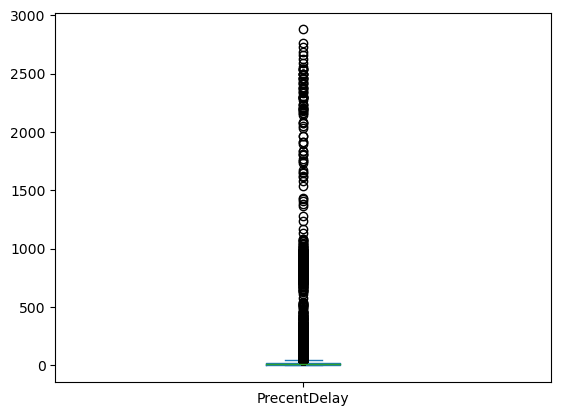

In [129]:

dfPlanes['PrecentDelay'] = (100 * dfPlanes['delay'])/dfPlanes['airTime']
dfPlanes['PrecentDelay'].plot.box()

<Axes: xlabel='PrecentDelay', ylabel='dest'>

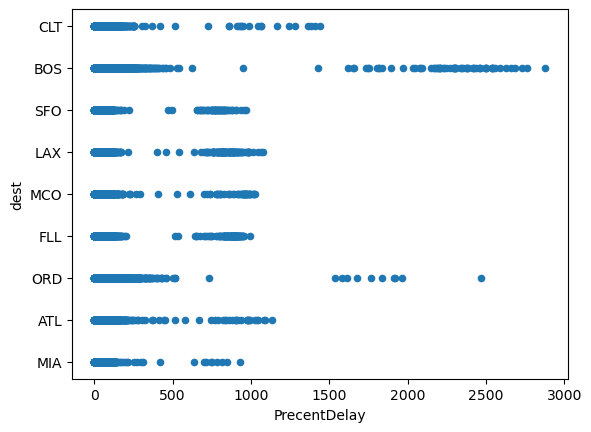

In [130]:

#dfPlanes.iloc[dfPlanes['PrecentDelay'].argmin()] #might look different due to the ABS, therefore i decided not to remove the high and low

dfPlanes.plot.scatter(x = 'PrecentDelay',y = 'dest')